# Representative Spectral Visualization for Textile Fibers

## Objective
Visualize and compare FTIR spectra across different textile fiber types:
1. **Individual Representative Spectra**: Average spectrum for each fiber class
2. **Comparative View**: All fiber classes overlaid on a single plot
3. **Multiple Representations**: Both Transmittance (%T) and Absorbance views

## Methodology
- Load raw spectral data from CSV files
- Calculate representative (mean) spectrum for each fiber type
- Provide interactive dropdown selection for individual fiber inspection
- Display side-by-side comparisons
- Convert between transmittance and absorbance representations

## Fiber Classes
- **Natural Fibers**: Cotton, Silk, Wool, Linen, Jute
- **Synthetic Fibers**: Polyester, Nylon, Acrylic, Modacrylic, Rayon

## Step 1: Import Required Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
from pathlib import Path
import re
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive widgets
from ipywidgets import interact, Dropdown
import ipywidgets as widgets

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
# Additional imports for peak detection
from scipy.signal import find_peaks

print("Peak detection libraries imported")

Peak detection libraries imported


## Step 2: Define Fiber Classification

Organize fibers into Natural and Synthetic categories for consistent visualization.

In [3]:
# Define fiber classification
FIBER_CLASSIFICATION = {
    # Natural fibers
    'Cotton': 'Natural',
    'Silk': 'Natural',
    'Wool': 'Natural',
    'Linen': 'Natural',
    'Jute': 'Natural',
    
    # Synthetic fibers
    'Polyester': 'Synthetic',
    'Nylon': 'Synthetic',
    'Acrylic': 'Synthetic',
    'Modacrylic': 'Synthetic',
    'Rayon': 'Synthetic'
}

print("Fiber Classification Defined:")
print(f"Natural Fibers: {[f for f, c in FIBER_CLASSIFICATION.items() if c == 'Natural']}")
print(f"Synthetic Fibers: {[f for f, c in FIBER_CLASSIFICATION.items() if c == 'Synthetic']}")

Fiber Classification Defined:
Natural Fibers: ['Cotton', 'Silk', 'Wool', 'Linen', 'Jute']
Synthetic Fibers: ['Polyester', 'Nylon', 'Acrylic', 'Modacrylic', 'Rayon']


## Step 3: Load Raw Spectral Data

Load all CSV files containing FTIR spectra (wavenumber vs %T).

In [4]:
# Load all CSV files from raw data folder
data_folder = Path('raw_csv_data')
csv_files = list(data_folder.glob("*.csv"))

print(f"Total CSV files found: {len(csv_files)}")

# Dictionary to store spectra organized by fiber type
# Structure: {fiber_type: [(wavenumbers, transmittance), ...]}
fiber_spectra = {fiber: [] for fiber in FIBER_CLASSIFICATION.keys()}
wavenumbers_ref = None

# Process each file
print("\nLoading spectral data...")
for csv_file in sorted(csv_files):
    # Extract fiber type from filename
    match = re.match(r"([a-zA-Z\s]+)", csv_file.stem)
    if match:
        fiber_type = match.group(1).strip()
    else:
        continue
    
    # Skip if fiber type not in classification
    if fiber_type not in FIBER_CLASSIFICATION:
        continue
    
    try:
        # Read CSV file
        df = pd.read_csv(csv_file, skiprows=1, header=0)
        
        # Extract wavenumbers and transmittance
        wavenumbers = df['cm-1'].values
        transmittance = df['%T'].values
        
        # Store reference wavenumbers
        if wavenumbers_ref is None:
            wavenumbers_ref = wavenumbers
        
        # Store spectrum for this fiber type
        fiber_spectra[fiber_type].append(transmittance)
        
    except Exception as e:
        print(f"Error processing {csv_file.name}: {str(e)}")

# Convert lists to numpy arrays and calculate statistics
print("\nData loading complete!")
print("\nSamples per fiber type:")
for fiber_type, spectra_list in fiber_spectra.items():
    if len(spectra_list) > 0:
        fiber_spectra[fiber_type] = np.array(spectra_list)
        category = FIBER_CLASSIFICATION[fiber_type]
        print(f"  {fiber_type:<15} ({category:<10}): {len(spectra_list):>2} samples")

print(f"\nWavenumber range: {wavenumbers_ref[0]:.1f} - {wavenumbers_ref[-1]:.1f} cm⁻¹")
print(f"Spectral resolution: {len(wavenumbers_ref)} data points")

Total CSV files found: 143

Loading spectral data...

Data loading complete!

Samples per fiber type:
  Cotton          (Natural   ): 11 samples
  Silk            (Natural   ): 11 samples
  Wool            (Natural   ): 23 samples
  Linen           (Natural   ):  6 samples
  Jute            (Natural   ):  2 samples
  Polyester       (Synthetic ): 13 samples
  Nylon           (Synthetic ): 13 samples
  Acrylic         (Synthetic ): 14 samples
  Modacrylic      (Synthetic ): 16 samples
  Rayon           (Synthetic ): 12 samples

Wavenumber range: 4000.0 - 550.0 cm⁻¹
Spectral resolution: 3451 data points

Data loading complete!

Samples per fiber type:
  Cotton          (Natural   ): 11 samples
  Silk            (Natural   ): 11 samples
  Wool            (Natural   ): 23 samples
  Linen           (Natural   ):  6 samples
  Jute            (Natural   ):  2 samples
  Polyester       (Synthetic ): 13 samples
  Nylon           (Synthetic ): 13 samples
  Acrylic         (Synthetic ): 14 sample

## Step 3.5: Dataset Distribution Visualization

Visualize the composition and distribution of the spectral dataset to understand:
- Overall balance between Natural and Synthetic fiber categories
- Sample count distribution across individual fiber types
- Identify any class imbalances that may affect analysis

In [5]:
# Calculate distribution statistics
category_counts = {'Natural': 0, 'Synthetic': 0}
fiber_type_counts = {}

for fiber_type, spectra_array in fiber_spectra.items():
    n_samples = len(spectra_array)
    if n_samples > 0:
        category = FIBER_CLASSIFICATION[fiber_type]
        category_counts[category] += n_samples
        fiber_type_counts[fiber_type] = n_samples

print("Dataset Distribution Summary:")
print("="*70)
print(f"\nTotal samples: {sum(category_counts.values())}")
print(f"\nCategory distribution:")
for category, count in category_counts.items():
    percentage = (count / sum(category_counts.values())) * 100
    print(f"  {category:<12}: {count:>3} samples ({percentage:>5.1f}%)")

print(f"\nFiber type distribution:")
for fiber_type in sorted(fiber_type_counts.keys()):
    count = fiber_type_counts[fiber_type]
    category = FIBER_CLASSIFICATION[fiber_type]
    percentage = (count / sum(category_counts.values())) * 100
    print(f"  {fiber_type:<15} ({category:<10}): {count:>2} samples ({percentage:>5.1f}%)")

Dataset Distribution Summary:

Total samples: 121

Category distribution:
  Natural     :  53 samples ( 43.8%)
  Synthetic   :  68 samples ( 56.2%)

Fiber type distribution:
  Acrylic         (Synthetic ): 14 samples ( 11.6%)
  Cotton          (Natural   ): 11 samples (  9.1%)
  Jute            (Natural   ):  2 samples (  1.7%)
  Linen           (Natural   ):  6 samples (  5.0%)
  Modacrylic      (Synthetic ): 16 samples ( 13.2%)
  Nylon           (Synthetic ): 13 samples ( 10.7%)
  Polyester       (Synthetic ): 13 samples ( 10.7%)
  Rayon           (Synthetic ): 12 samples (  9.9%)
  Silk            (Natural   ): 11 samples (  9.1%)
  Wool            (Natural   ): 23 samples ( 19.0%)


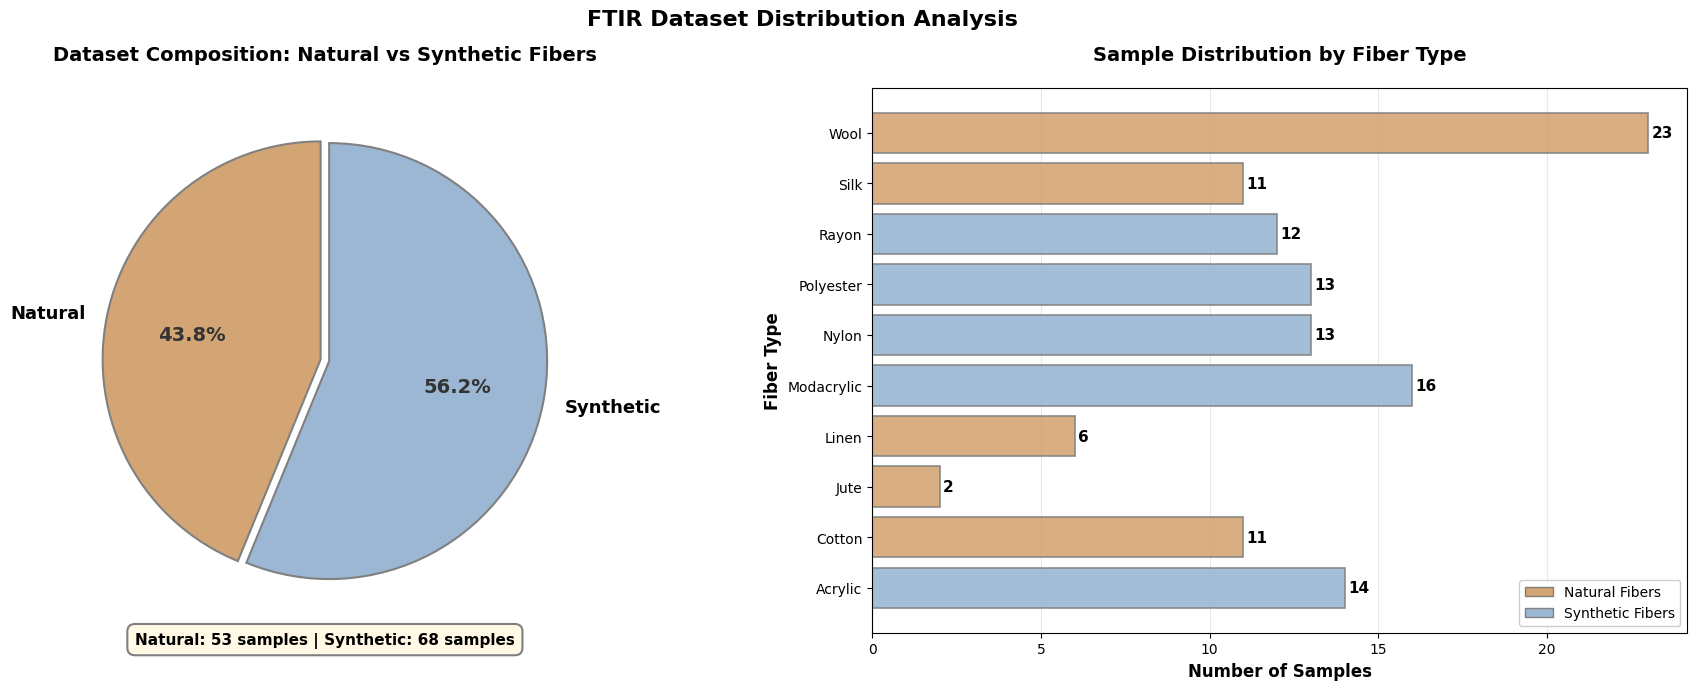


Visualization complete!

Key observations:
  - Dataset balance: 43.8% Natural, 56.2% Synthetic
  - Most samples: Wool (23 samples)
  - Least samples: Jute (2 samples)
  - Class imbalance ratio: 11.50:1 (max:min)


In [6]:
# Create side-by-side distribution visualizations
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# LEFT PANEL: Pie chart for Natural vs Synthetic distribution
categories = list(category_counts.keys())
counts = list(category_counts.values())
colors_pie = ['#D4A574', '#9BB7D4']  # Soft tan for Natural, Powder blue for Synthetic
explode = (0.02, 0.02)  # Slightly separate both slices for emphasis

wedges, texts, autotexts = axes[0].pie(counts, 
                                        labels=categories, 
                                        colors=colors_pie,
                                        autopct='%1.1f%%',
                                        startangle=90,
                                        explode=explode,
                                        textprops={'fontsize': 13, 'fontweight': 'bold'},
                                        wedgeprops={'edgecolor': 'gray', 'linewidth': 1.5})

# Enhance autopct text (percentage labels)
for autotext in autotexts:
    autotext.set_color('#333333')
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

# Add count labels
axes[0].text(0, -1.3, 
            f"Natural: {category_counts['Natural']} samples | Synthetic: {category_counts['Synthetic']} samples",
            ha='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#FFF9E6', edgecolor='gray', linewidth=1.5))

axes[0].set_title('Dataset Composition: Natural vs Synthetic Fibers', 
                 fontsize=14, fontweight='bold', pad=20)

# RIGHT PANEL: Bar chart for individual fiber type distribution
fiber_types_sorted = sorted(fiber_type_counts.keys())
counts_sorted = [fiber_type_counts[ft] for ft in fiber_types_sorted]
categories_sorted = [FIBER_CLASSIFICATION[ft] for ft in fiber_types_sorted]

# Color bars based on category
bar_colors = ['#D4A574' if cat == 'Natural' else '#9BB7D4' 
              for cat in categories_sorted]

bars = axes[1].barh(fiber_types_sorted, counts_sorted, color=bar_colors, 
                    edgecolor='gray', linewidth=1.2, alpha=0.9)

# Add value labels on bars
for i, (bar, count) in enumerate(zip(bars, counts_sorted)):
    width = bar.get_width()
    axes[1].text(width+0.1, bar.get_y() + bar.get_height()/2,
                f'{count}',
                ha='left', va='center', fontsize=11, fontweight='bold')

axes[1].set_xlabel('Number of Samples', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Fiber Type', fontsize=12, fontweight='bold')
axes[1].set_title('Sample Distribution by Fiber Type', fontsize=14, fontweight='bold', pad=20)
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].set_axisbelow(True)

# Add legend for colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#D4A574', edgecolor='gray', label='Natural Fibers'),
    Patch(facecolor='#9BB7D4', edgecolor='gray', label='Synthetic Fibers')
]
axes[1].legend(handles=legend_elements, loc='lower right', fontsize=10, framealpha=0.95)

plt.suptitle('FTIR Dataset Distribution Analysis', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\nVisualization complete!")
print("="*70)
print("\nKey observations:")
total_samples = sum(category_counts.values())
natural_pct = (category_counts['Natural'] / total_samples) * 100
synthetic_pct = (category_counts['Synthetic'] / total_samples) * 100
print(f"  - Dataset balance: {natural_pct:.1f}% Natural, {synthetic_pct:.1f}% Synthetic")

# Find fiber types with most and least samples
max_fiber = max(fiber_type_counts, key=fiber_type_counts.get)
min_fiber = min(fiber_type_counts, key=fiber_type_counts.get)
print(f"  - Most samples: {max_fiber} ({fiber_type_counts[max_fiber]} samples)")
print(f"  - Least samples: {min_fiber} ({fiber_type_counts[min_fiber]} samples)")

# Calculate class imbalance ratio
max_count = max(fiber_type_counts.values())
min_count = min(fiber_type_counts.values())
imbalance_ratio = max_count / min_count
print(f"  - Class imbalance ratio: {imbalance_ratio:.2f}:1 (max:min)")

## Step 4: Calculate Representative Spectra

Compute the mean spectrum for each fiber type to create representative spectra.

**Representative Spectrum Calculation:**
$$\bar{S}_{fiber}(\lambda) = \frac{1}{n}\sum_{i=1}^{n}S_i(\lambda)$$

Where:
- $\bar{S}_{fiber}(\lambda)$ = Mean spectrum for a fiber type at wavenumber $\lambda$
- $n$ = Number of samples for that fiber type
- $S_i(\lambda)$ = Individual spectrum $i$ at wavenumber $\lambda$

In [7]:
# Calculate mean (representative) and standard deviation for each fiber type
representative_spectra = {}
std_spectra = {}

for fiber_type, spectra_array in fiber_spectra.items():
    if len(spectra_array) > 0:
        # Calculate mean spectrum (representative)
        representative_spectra[fiber_type] = np.mean(spectra_array, axis=0)
        
        # Calculate standard deviation (variability)
        std_spectra[fiber_type] = np.std(spectra_array, axis=0)

print("Representative spectra calculated for all fiber types")
print(f"Total fiber types: {len(representative_spectra)}")

Representative spectra calculated for all fiber types
Total fiber types: 10


## Step 5: Transmittance Visualization

### Part A: Original %T (Percent Transmittance) Representation

Visualize raw spectral data as recorded by the FTIR instrument:
- **Left panel**: Individual representative spectrum (mean) for selected fiber
- **Right panel**: All fiber types overlaid for comparison

**Transmittance (%T)**: Percentage of light transmitted through the sample at each wavenumber.

In [8]:
def detect_peaks_in_spectrum(wavenumbers, spectrum, is_absorbance=True, 
                             prominence=0.02, distance=20, n_peaks=15):
    """
    Detect significant peaks in FTIR spectrum.
    
    Parameters:
    -----------
    wavenumbers : array-like
        Wavenumber values (cm-1)
    spectrum : array-like
        Spectral intensity values
    is_absorbance : bool, default=True
        If True, detect maxima (absorbance peaks)
        If False, detect minima (transmittance valleys)
    prominence : float, default=0.02
        Minimum prominence of peaks (lower = more sensitive)
    distance : int, default=20
        Minimum number of data points between peaks (lower = more peaks detected)
    n_peaks : int, default=15
        Maximum number of peaks to return (higher = more peaks)
    
    Returns:
    --------
    peak_wavenumbers : ndarray
        Wavenumbers at peak positions
    peak_intensities : ndarray
        Intensity values at peak positions
    """
    # For transmittance, invert to find minima as peaks
    if not is_absorbance:
        spectrum = -spectrum
    
    # Find peaks
    peaks, properties = find_peaks(spectrum, prominence=prominence, distance=distance)
    
    # Sort by prominence and keep top n_peaks
    if len(peaks) > n_peaks:
        prominences = properties['prominences']
        top_indices = np.argsort(prominences)[-n_peaks:]
        peaks = peaks[top_indices]
    
    # Sort peaks by wavenumber (descending)
    sorted_indices = np.argsort(wavenumbers[peaks])[::-1]
    peaks = peaks[sorted_indices]
    
    peak_wavenumbers = wavenumbers[peaks]
    peak_intensities = spectrum[peaks] if is_absorbance else -spectrum[peaks]
    
    return peak_wavenumbers, peak_intensities

# Detect peaks for all representative spectra
print("Detecting peaks in representative spectra...")
peaks_transmittance = {}
peaks_absorbance = {}

for fiber_type in representative_spectra.keys():
    # Transmittance peaks (valleys)
    trans_spectrum = representative_spectra[fiber_type]
    peak_wn_t, peak_int_t = detect_peaks_in_spectrum(
        wavenumbers_ref, trans_spectrum, 
        is_absorbance=False, prominence=1.0, distance=20, n_peaks=15
    )
    peaks_transmittance[fiber_type] = (peak_wn_t, peak_int_t)

print(f"Peaks detected for {len(peaks_transmittance)} fiber types")

Detecting peaks in representative spectra...
Peaks detected for 10 fiber types


### Peak Detection for Representative Spectra

Identify significant peaks in the representative spectra for each fiber type.

**Peak Detection Parameters:**
- **For Transmittance**: Detect minima (troughs) as absorption bands
- **For Absorbance**: Detect maxima as absorption peaks
- **Prominence**: Minimum peak height relative to background
- **Distance**: Minimum separation between peaks

In [9]:
def plot_transmittance_comparison(selected_fiber):
    """
    Plot side-by-side comparison of transmittance spectra.
    
    Left: Individual fiber with variability band (mean +/- std)
    Right: All fibers overlaid for comparison
    
    Parameters:
    -----------
    selected_fiber : str
        Fiber type to highlight in individual plot
    """
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # LEFT PANEL: Individual fiber with variability
    mean_spectrum = representative_spectra[selected_fiber]
    std_spectrum = std_spectra[selected_fiber]
    category = FIBER_CLASSIFICATION[selected_fiber]
    
    # Plot mean spectrum
    color = 'green' if category == 'Natural' else 'blue'
    axes[0].plot(wavenumbers_ref, mean_spectrum, linewidth=2.5, 
                color=color, label=f'{selected_fiber} (mean)', alpha=0.8)
    
    # Plot variability band (mean +/- 1 standard deviation)
    axes[0].fill_between(wavenumbers_ref, 
                         mean_spectrum - std_spectrum,
                         mean_spectrum + std_spectrum,
                         color=color, alpha=0.2, label='± 1 std dev')
    
    # Annotate peaks
    peak_wn, peak_int = peaks_transmittance[selected_fiber]
    axes[0].plot(peak_wn, peak_int, 'ro', markersize=8, label='Detected Peaks')
    for i, (wn, intensity) in enumerate(zip(peak_wn, peak_int)):
        axes[0].annotate(f'{int(wn)}', 
                        xy=(wn, intensity), 
                        xytext=(0, -15),
                        textcoords='offset points',
                        ha='center', fontsize=8, 
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    axes[0].set_xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Transmittance (%T)', fontsize=12, fontweight='bold')
    axes[0].set_title(f'Representative Spectrum: {selected_fiber} ({category})', 
                     fontsize=13, fontweight='bold')
    axes[0].invert_xaxis()
    axes[0].legend(loc='best', fontsize=10)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(4000, 550)
    
    # RIGHT PANEL: All individual scans for selected fiber
    all_scans = fiber_spectra[selected_fiber]
    n_samples = len(all_scans)
    
    # Plot all individual scans
    for i, scan in enumerate(all_scans):
        axes[1].plot(wavenumbers_ref, scan, linewidth=1.2, 
                    color=color, alpha=0.5, label=f'Sample {i+1}' if i < 3 else '')
    
    # Overlay mean spectrum
    axes[1].plot(wavenumbers_ref, mean_spectrum, linewidth=3, 
                color='red', label='Mean (Representative)', alpha=0.9, zorder=10)
    
    axes[1].set_xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Transmittance (%T)', fontsize=12, fontweight='bold')
    axes[1].set_title(f'All Sample Scans: {selected_fiber} (n={n_samples})', 
                     fontsize=13, fontweight='bold')
    axes[1].invert_xaxis()
    axes[1].legend(loc='best', fontsize=10)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(4000, 550)
    
    plt.suptitle('Transmittance Spectra: Individual vs Comparative View', fontsize=16, fontweight='bold') 
    plt.suptitle('Transmittance Spectra: Representative vs All Sample Scans', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    n_samples = len(fiber_spectra[selected_fiber])
    print(f"\nSelected Fiber: {selected_fiber}")
    print(f"Category: {category}")
    print(f"Number of samples: {n_samples}")
    print(f"Mean transmittance range: {mean_spectrum.min():.2f} - {mean_spectrum.max():.2f} %T")
    print(f"Average variability (std): {np.mean(std_spectrum):.2f} %T")    
    # Calculate coefficient of variation
    cv = (std_spectrum / mean_spectrum) * 100
    print(f"Mean coefficient of variation: {np.mean(cv[np.isfinite(cv)]):.2f}%")

### Interactive Dropdown: Select Fiber Type for Transmittance View

In [10]:
# Create interactive dropdown widget
fiber_types_list = sorted(representative_spectra.keys())

interact(plot_transmittance_comparison,
         selected_fiber=Dropdown(
             options=fiber_types_list,
             value=fiber_types_list[0],
             description='Fiber Type:',
             style={'description_width': 'initial'}
         ));

interactive(children=(Dropdown(description='Fiber Type:', options=('Acrylic', 'Cotton', 'Jute', 'Linen', 'Moda…

## Step 6: Absorbance Visualization

### Part B: Converted to Absorbance Representation

**Absorbance (A)**: Measure of light absorbed by the sample, calculated from transmittance.

**Conversion Formula:**
$$A = 2 - \log_{10}(T)$$

Where:
- $A$ = Absorbance
- $T$ = Transmittance (as percentage, e.g., 50%T = 50)

**Why Absorbance?**
- Peaks point upward (more intuitive for spectroscopists)
- Linear relationship with concentration (Beer-Lambert Law)
- Better for quantitative analysis
- Commonly used in chemometric analysis

In [11]:
# Convert transmittance to absorbance for all representative spectra
representative_absorbance = {}
std_absorbance = {}

for fiber_type in representative_spectra.keys():
    # Convert mean transmittance to absorbance
    trans_mean = representative_spectra[fiber_type]
    representative_absorbance[fiber_type] = 2 - np.log10(trans_mean + 1e-9)
    
    # Convert all individual spectra to absorbance for std calculation
    absorbance_samples = 2 - np.log10(fiber_spectra[fiber_type] + 1e-9)
    std_absorbance[fiber_type] = np.std(absorbance_samples, axis=0)

print("Transmittance converted to absorbance for all fiber types")
print(f"Total fiber types: {len(representative_absorbance)}")

for fiber_type in representative_spectra.keys():
    # Absorbance peaks
    abs_spectrum = representative_absorbance[fiber_type]
    peak_wn_a, peak_int_a = detect_peaks_in_spectrum(
        wavenumbers_ref, abs_spectrum,
        is_absorbance=True, prominence=0.01, distance=20, n_peaks=15
    )
    peaks_absorbance[fiber_type] = (peak_wn_a, peak_int_a)

print(f"Peaks detected for {len(peaks_absorbance)} fiber types")

Transmittance converted to absorbance for all fiber types
Total fiber types: 10
Peaks detected for 10 fiber types


In [12]:
def plot_absorbance_comparison(selected_fiber):
    """
    Plot side-by-side comparison of absorbance spectra.
    
    Left: Individual fiber with variability band (mean +/- std)
    Right: All fibers overlaid for comparison
    
    Parameters:
    -----------
    selected_fiber : str
        Fiber type to highlight in individual plot
    """
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    
    # LEFT PANEL: Individual fiber with variability
    mean_absorbance = representative_absorbance[selected_fiber]
    std_abs = std_absorbance[selected_fiber]
    category = FIBER_CLASSIFICATION[selected_fiber]
    
    # Plot mean absorbance
    color = 'green' if category == 'Natural' else 'blue'
    axes[0].plot(wavenumbers_ref, mean_absorbance, linewidth=2.5, 
                color=color, label=f'{selected_fiber} (mean)', alpha=0.8)
    
    # Plot variability band (mean +/- 1 standard deviation)
    axes[0].fill_between(wavenumbers_ref, 
                         mean_absorbance - std_abs,
                         mean_absorbance + std_abs,
                         color=color, alpha=0.2, label='± 1 std dev')
    
    # Annotate peaks
    peak_wn, peak_int = peaks_absorbance[selected_fiber]
    axes[0].plot(peak_wn, peak_int, 'ro', markersize=8, label='Detected Peaks')
    for i, (wn, intensity) in enumerate(zip(peak_wn, peak_int)):
        axes[0].annotate(f'{int(wn)}', 
                        xy=(wn, intensity), 
                        xytext=(0, 10),
                        textcoords='offset points',
                        ha='center', fontsize=8, 
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    axes[0].set_xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Absorbance', fontsize=12, fontweight='bold')
    axes[0].set_title(f'Representative Spectrum: {selected_fiber} ({category})', 
                     fontsize=13, fontweight='bold')
    axes[0].invert_xaxis()
    axes[0].legend(loc='best', fontsize=10)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(4000, 550)
    
    # RIGHT PANEL: All individual scans for selected fiber (converted to absorbance)
    all_scans_trans = fiber_spectra[selected_fiber]
    all_scans_abs = 2 - np.log10(all_scans_trans + 1e-9)
    n_samples = len(all_scans_abs)
    
    # Plot all individual scans
    for i, scan in enumerate(all_scans_abs):
        axes[1].plot(wavenumbers_ref, scan, linewidth=1.2, 
                    color=color, alpha=0.5, label=f'Sample {i+1}' if i < 3 else '')
    
    # Overlay mean absorbance
    axes[1].plot(wavenumbers_ref, mean_absorbance, linewidth=3, 
                color='red', label='Mean (Representative)', alpha=0.9, zorder=10)
    
    axes[1].set_xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Absorbance', fontsize=12, fontweight='bold')
    axes[1].set_title(f'All Sample Scans: {selected_fiber} (n={n_samples})', 
                     fontsize=13, fontweight='bold')
    axes[1].invert_xaxis()
    axes[1].legend(loc='best', fontsize=10)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(4000, 550)
    
    plt.suptitle('Absorbance Spectra: Representative vs All Sample Scans', 
                fontsize=15, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nSelected Fiber: {selected_fiber}")
    print(f"Category: {category}")
    print(f"Number of samples: {n_samples}")
    print(f"Mean absorbance range: {mean_absorbance.min():.3f} - {mean_absorbance.max():.3f}")
    print(f"Average variability (std): {np.mean(std_abs):.3f}")
    
    # Calculate coefficient of variation
    cv = (std_abs / mean_absorbance) * 100
    print(f"Mean coefficient of variation: {np.mean(cv[np.isfinite(cv)]):.2f}%")

### Interactive Dropdown: Select Fiber Type for Absorbance View

In [13]:
# Create interactive dropdown widget for absorbance view
interact(plot_absorbance_comparison,
         selected_fiber=Dropdown(
             options=fiber_types_list,
             value=fiber_types_list[0],
             description='Fiber Type:',
             style={'description_width': 'initial'}
         ));

interactive(children=(Dropdown(description='Fiber Type:', options=('Acrylic', 'Cotton', 'Jute', 'Linen', 'Moda…

## Step 7: Static Comparison Plots

Non-interactive versions for documentation and publication.

### Transmittance: All Fibers Comparison

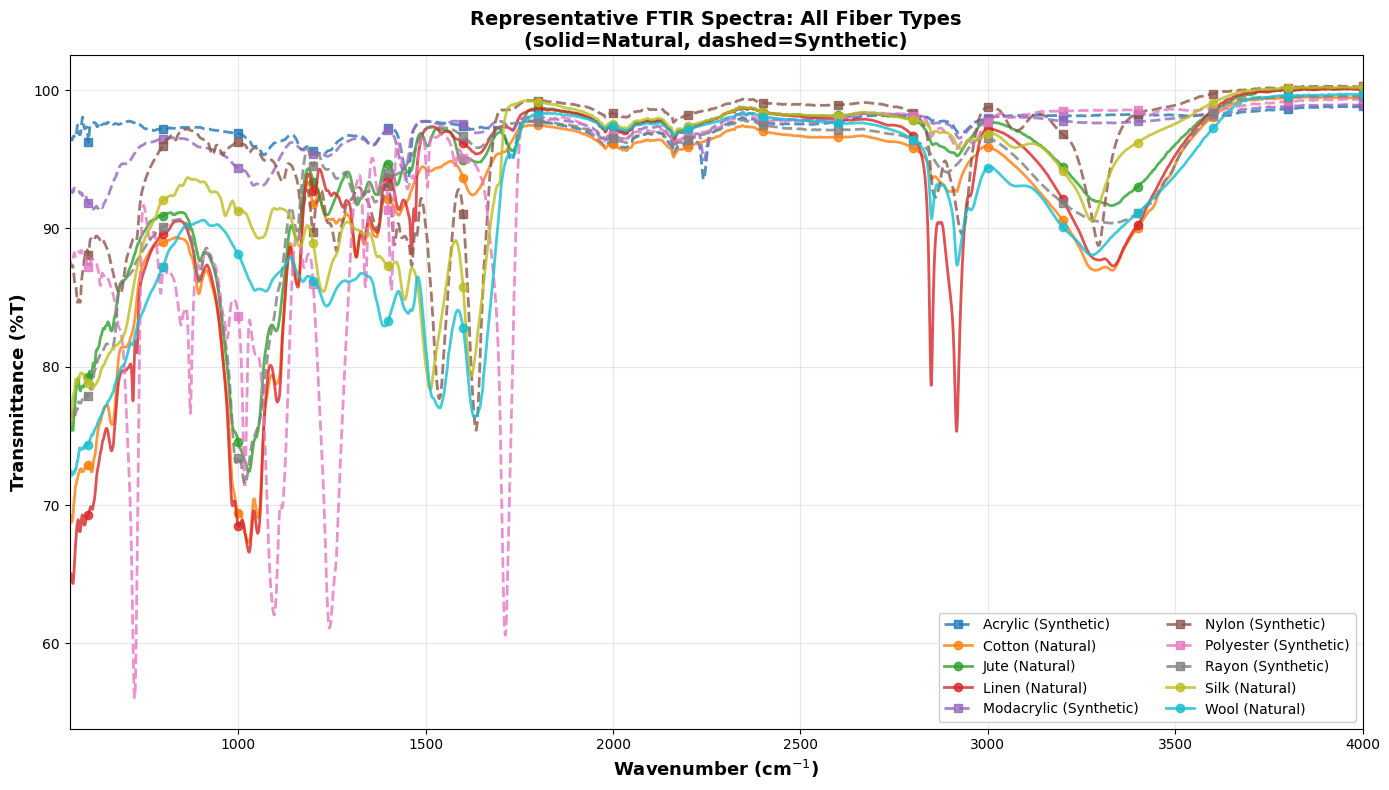

In [14]:
# Static plot: All fibers in transmittance mode
plt.figure(figsize=(14, 8))

fiber_colors = plt.cm.tab10(np.linspace(0, 1, len(representative_spectra)))

for idx, (fiber_type, mean_spec) in enumerate(sorted(representative_spectra.items())):
    cat = FIBER_CLASSIFICATION[fiber_type]
    linestyle = '-' if cat == 'Natural' else '--'
    marker = 'o' if cat == 'Natural' else 's'
    
    plt.plot(wavenumbers_ref, mean_spec, 
            linewidth=2, color=fiber_colors[idx], linestyle=linestyle,
            label=f'{fiber_type} ({cat})', alpha=0.8, 
            marker=marker, markevery=200, markersize=6)

plt.xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=13, fontweight='bold')
plt.ylabel('Transmittance (%T)', fontsize=13, fontweight='bold')
plt.title('Representative FTIR Spectra: All Fiber Types\n(solid=Natural, dashed=Synthetic)', 
         fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10, ncol=2, framealpha=0.95)
plt.grid(True, alpha=0.3)
plt.xlim(4000, 550)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

### Absorbance: All Fibers Comparison

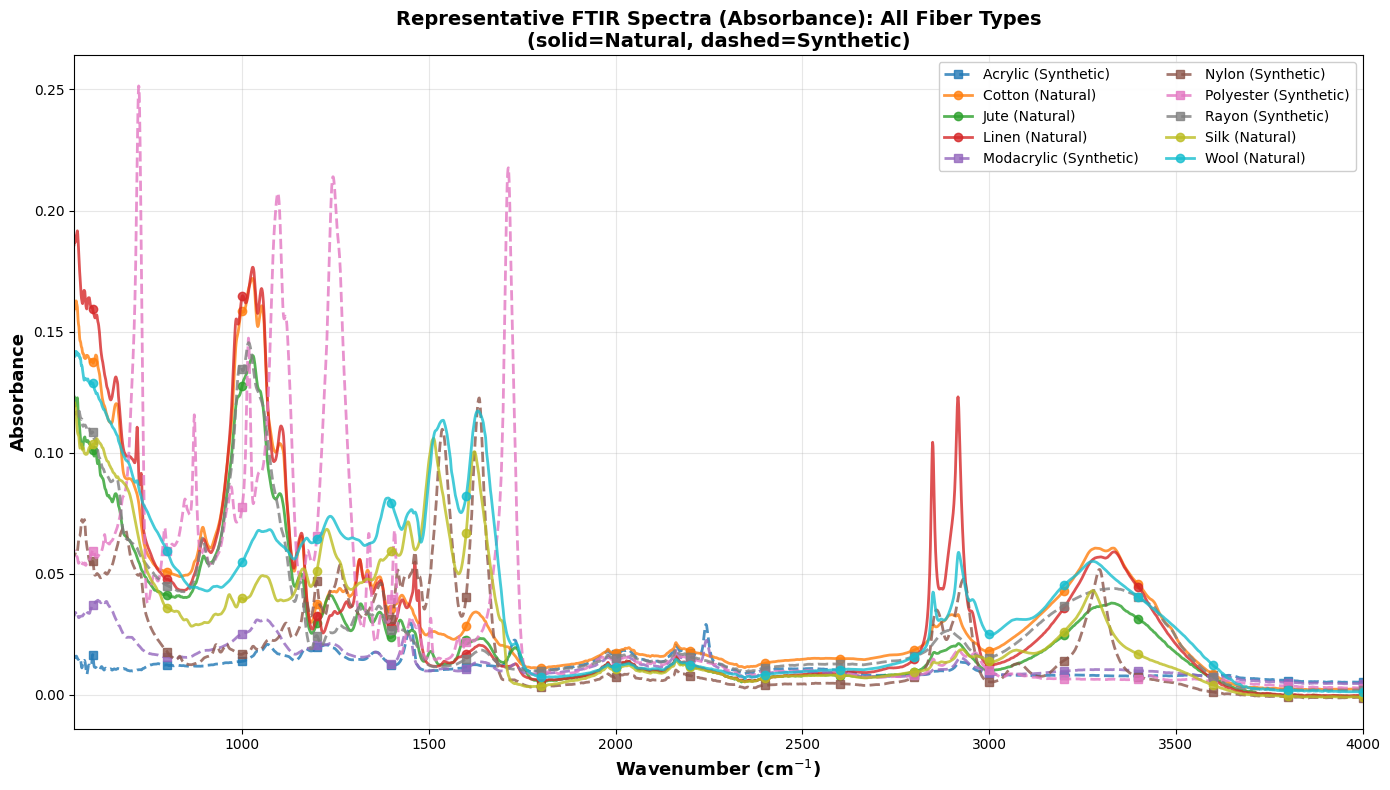

In [15]:
# Static plot: All fibers in absorbance mode
plt.figure(figsize=(14, 8))

fiber_colors = plt.cm.tab10(np.linspace(0, 1, len(representative_absorbance)))

for idx, (fiber_type, mean_abs) in enumerate(sorted(representative_absorbance.items())):
    cat = FIBER_CLASSIFICATION[fiber_type]
    linestyle = '-' if cat == 'Natural' else '--'
    marker = 'o' if cat == 'Natural' else 's'
    
    plt.plot(wavenumbers_ref, mean_abs, 
            linewidth=2, color=fiber_colors[idx], linestyle=linestyle,
            label=f'{fiber_type} ({cat})', alpha=0.8,
            marker=marker, markevery=200, markersize=6)

plt.xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=13, fontweight='bold')
plt.ylabel('Absorbance', fontsize=13, fontweight='bold')
plt.title('Representative FTIR Spectra (Absorbance): All Fiber Types\n(solid=Natural, dashed=Synthetic)', 
         fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10, ncol=2, framealpha=0.95)
plt.grid(True, alpha=0.3)
plt.xlim(4000, 550)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [16]:
# Create peak information dataframe
peak_data = []

for fiber_type in sorted(representative_spectra.keys()):
    category = FIBER_CLASSIFICATION[fiber_type]
    
    # Transmittance peaks
    peak_wn_t, peak_int_t = peaks_transmittance[fiber_type]
    for wn, intensity in zip(peak_wn_t, peak_int_t):
        peak_data.append({
            'Fiber_Type': fiber_type,
            'Category': category,
            'Representation': 'Transmittance',
            'Peak_Wavenumber_cm-1': int(wn),
            'Intensity': round(intensity, 2)
        })
    
    # Absorbance peaks
    peak_wn_a, peak_int_a = peaks_absorbance[fiber_type]
    for wn, intensity in zip(peak_wn_a, peak_int_a):
        peak_data.append({
            'Fiber_Type': fiber_type,
            'Category': category,
            'Representation': 'Absorbance',
            'Peak_Wavenumber_cm-1': int(wn),
            'Intensity': round(intensity, 3)
        })

# # Save to CSV - ONLY ENABLE WHEN NEEDED
peak_df = pd.DataFrame(peak_data)
peak_csv_path = './Detected_Peaks_Summary.csv'
# peak_df.to_csv(peak_csv_path, index=False)

print("\nPeak Information Export:")
print("-"*70)
print(f"Saved: Detected_Peaks_Summary.csv")
print(f"\nTotal peaks detected: {len(peak_df)}")
print(f"  - Transmittance peaks: {len(peak_df[peak_df['Representation'] == 'Transmittance'])}")
print(f"  - Absorbance peaks: {len(peak_df[peak_df['Representation'] == 'Absorbance'])}")
print(f"\nPreview:")
print(peak_df.head(15))


Peak Information Export:
----------------------------------------------------------------------
Saved: Detected_Peaks_Summary.csv

Total peaks detected: 182
  - Transmittance peaks: 110
  - Absorbance peaks: 72

Preview:
   Fiber_Type   Category Representation  Peak_Wavenumber_cm-1  Intensity
0     Acrylic  Synthetic  Transmittance                  2923     96.920
1     Acrylic  Synthetic  Transmittance                  2242     93.520
2     Acrylic  Synthetic  Transmittance                  2035     95.820
3     Acrylic  Synthetic  Transmittance                  1730     94.920
4     Acrylic  Synthetic  Transmittance                  1451     93.390
5     Acrylic  Synthetic  Transmittance                  1224     95.350
6     Acrylic  Synthetic  Transmittance                  1068     95.310
7     Acrylic  Synthetic  Transmittance                   600     96.230
8     Acrylic  Synthetic     Absorbance                  2242      0.029
9     Acrylic  Synthetic     Absorbance         

### Export Peak Information to CSV

Save detected peak positions for each fiber type for reference and documentation.

In [ ]:
# Export comparison plot - Transmittance
print("\nExporting Comparison Plots:")
print("-"*70)

fig = plt.figure(figsize=(14, 8))
fiber_colors = plt.cm.tab10(np.linspace(0, 1, len(representative_spectra)))

for idx, (fiber_type, mean_spec) in enumerate(sorted(representative_spectra.items())):
    cat = FIBER_CLASSIFICATION[fiber_type]
    linestyle = '-' if cat == 'Natural' else '--'
    marker = 'o' if cat == 'Natural' else 's'
    
    plt.plot(wavenumbers_ref, mean_spec, 
            linewidth=2, color=fiber_colors[idx], linestyle=linestyle,
            label=f'{fiber_type} ({cat})', alpha=0.8, 
            marker=marker, markevery=200, markersize=6)

plt.xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=13, fontweight='bold')
plt.ylabel('Transmittance (%T)', fontsize=13, fontweight='bold')
plt.title('Representative FTIR Spectra: All Fiber Types\n(solid=Natural, dashed=Synthetic)', 
         fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10, ncol=2, framealpha=0.95)
plt.grid(True, alpha=0.3)
plt.xlim(4000, 550)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('./images/All_Fibers_Transmittance_Comparison.png', dpi=300, bbox_inches='tight')
plt.close()
print(f"  Saved: All_Fibers_Transmittance_Comparison.png")

# Export comparison plot - Absorbance
fig = plt.figure(figsize=(14, 8))
fiber_colors = plt.cm.tab10(np.linspace(0, 1, len(representative_absorbance)))

for idx, (fiber_type, mean_abs) in enumerate(sorted(representative_absorbance.items())):
    cat = FIBER_CLASSIFICATION[fiber_type]
    linestyle = '-' if cat == 'Natural' else '--'
    marker = 'o' if cat == 'Natural' else 's'
    
    plt.plot(wavenumbers_ref, mean_abs, 
            linewidth=2, color=fiber_colors[idx], linestyle=linestyle,
            label=f'{fiber_type} ({cat})', alpha=0.8,
            marker=marker, markevery=200, markersize=6)

plt.xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=13, fontweight='bold')
plt.ylabel('Absorbance', fontsize=13, fontweight='bold')
plt.title('Representative FTIR Spectra (Absorbance): All Fiber Types\n(solid=Natural, dashed=Synthetic)', 
         fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10, ncol=2, framealpha=0.95)
plt.grid(True, alpha=0.3)
plt.xlim(4000, 550)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig('./images/All_Fibers_Absorbance_Comparison.png', dpi=300, bbox_inches='tight')
plt.close()
print(f"  Saved: All_Fibers_Absorbance_Comparison.png")

print("\n" + "="*70)
print("EXPORT COMPLETE")
print("="*70)
print(f"\nTotal PNG files created: {len(representative_spectra) * 2 + 2}")
print(f"  - Individual Transmittance spectra: {len(representative_spectra)}")
print(f"  - Individual Absorbance spectra: {len(representative_absorbance)}")


Exporting Comparison Plots:
----------------------------------------------------------------------
  Saved: All_Fibers_Transmittance_Comparison.png
  Saved: All_Fibers_Transmittance_Comparison.png
  Saved: All_Fibers_Absorbance_Comparison.png

EXPORT COMPLETE

Total PNG files created: 22
  - Individual Transmittance spectra: 10
  - Individual Absorbance spectra: 10
  Saved: All_Fibers_Absorbance_Comparison.png

EXPORT COMPLETE

Total PNG files created: 22
  - Individual Transmittance spectra: 10
  - Individual Absorbance spectra: 10


### Export Comparison Plots

In [18]:
import os

def export_absorbance_spectrum(fiber_type, save_path):
    """
    Export a single fiber's absorbance spectrum with peak annotations.
    
    Parameters:
    -----------
    fiber_type : str
        Name of the fiber type
    save_path : Path
        Path to save the PNG file
    """
    mean_absorbance = representative_absorbance[fiber_type]
    std_abs = std_absorbance[fiber_type]
    category = FIBER_CLASSIFICATION[fiber_type]
    color = 'green' if category == 'Natural' else 'blue'
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Plot mean absorbance
    ax.plot(wavenumbers_ref, mean_absorbance, linewidth=2.5, 
            color=color, label=f'{fiber_type} (mean)', alpha=0.8)
    
    # Plot variability band
    ax.fill_between(wavenumbers_ref, 
                    mean_absorbance - std_abs,
                    mean_absorbance + std_abs,
                    color=color, alpha=0.2, label='± 1 std dev')
    
    # Annotate peaks
    peak_wn, peak_int = peaks_absorbance[fiber_type]
    ax.plot(peak_wn, peak_int, 'ro', markersize=10, label='Detected Peaks', zorder=5)
    for wn, intensity in zip(peak_wn, peak_int):
        ax.annotate(f'{int(wn)}', 
                   xy=(wn, intensity), 
                   xytext=(0, 12),
                   textcoords='offset points',
                   ha='center', fontsize=9, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', 
                            edgecolor='red', alpha=0.8))
    
    ax.set_xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Absorbance', fontsize=13, fontweight='bold')
    ax.set_title(f'Representative FTIR Spectrum (Absorbance): {fiber_type} ({category})', 
                fontsize=14, fontweight='bold')
    ax.invert_xaxis()
    ax.legend(loc='best', fontsize=11, framealpha=0.95)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_xlim(4000, 550)
    
    # Add sample count info
    n_samples = len(fiber_spectra[fiber_type])
    ax.text(0.02, 0.98, f'n = {n_samples} samples', 
           transform=ax.transAxes, fontsize=10,
           verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

# Export all absorbance spectra
print("\nExporting Absorbance Spectra:")
print("-"*70)
for fiber_type in sorted(representative_absorbance.keys()):
    filename = f"{fiber_type.replace(' ', '_')}_Absorbance.png"
    save_path = os.path.join('./images/all-A-spectra/', filename)
    export_absorbance_spectrum(fiber_type, save_path)
    print(f"  Saved: {filename}")

print(f"\nAbsorbance spectra exported: {len(representative_absorbance)} files")


Exporting Absorbance Spectra:
----------------------------------------------------------------------
  Saved: Acrylic_Absorbance.png
  Saved: Acrylic_Absorbance.png
  Saved: Cotton_Absorbance.png
  Saved: Cotton_Absorbance.png
  Saved: Jute_Absorbance.png
  Saved: Jute_Absorbance.png
  Saved: Linen_Absorbance.png
  Saved: Linen_Absorbance.png
  Saved: Modacrylic_Absorbance.png
  Saved: Modacrylic_Absorbance.png
  Saved: Nylon_Absorbance.png
  Saved: Nylon_Absorbance.png
  Saved: Polyester_Absorbance.png
  Saved: Polyester_Absorbance.png
  Saved: Rayon_Absorbance.png
  Saved: Rayon_Absorbance.png
  Saved: Silk_Absorbance.png
  Saved: Silk_Absorbance.png
  Saved: Wool_Absorbance.png

Absorbance spectra exported: 10 files
  Saved: Wool_Absorbance.png

Absorbance spectra exported: 10 files


### Export Transmittance Spectra with Peaks

In [20]:
def export_transmittance_spectrum(fiber_type, save_path):
    """
    Export a single fiber's transmittance spectrum with peak annotations.
    
    Parameters:
    -----------
    fiber_type : str
        Name of the fiber type
    save_path : Path
        Path to save the PNG file
    """
    mean_spectrum = representative_spectra[fiber_type]
    std_spectrum = std_spectra[fiber_type]
    category = FIBER_CLASSIFICATION[fiber_type]
    color = 'green' if category == 'Natural' else 'blue'
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Plot mean spectrum
    ax.plot(wavenumbers_ref, mean_spectrum, linewidth=2.5, 
            color=color, label=f'{fiber_type} (mean)', alpha=0.8)
    
    # Plot variability band
    ax.fill_between(wavenumbers_ref, 
                    mean_spectrum - std_spectrum,
                    mean_spectrum + std_spectrum,
                    color=color, alpha=0.2, label='± 1 std dev')
    
    # Annotate peaks
    peak_wn, peak_int = peaks_transmittance[fiber_type]
    ax.plot(peak_wn, peak_int, 'ro', markersize=10, label='Detected Peaks', zorder=5)
    for wn, intensity in zip(peak_wn, peak_int):
        ax.annotate(f'{int(wn)}', 
                   xy=(wn, intensity), 
                   xytext=(0, -18),
                   textcoords='offset points',
                   ha='center', fontsize=9, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', 
                            edgecolor='red', alpha=0.8))
    
    ax.set_xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Transmittance (%T)', fontsize=13, fontweight='bold')
    ax.set_title(f'Representative FTIR Spectrum: {fiber_type} ({category})', 
                fontsize=14, fontweight='bold')
    ax.invert_xaxis()
    ax.legend(loc='best', fontsize=11, framealpha=0.95)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_xlim(4000, 550)
    
    # Add sample count info
    n_samples = len(fiber_spectra[fiber_type])
    ax.text(0.02, 0.98, f'n = {n_samples} samples', 
           transform=ax.transAxes, fontsize=10,
           verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

# Export all transmittance spectra
print("\nExporting Transmittance Spectra:")
print("-"*70)
for fiber_type in sorted(representative_spectra.keys()):
    filename = f"{fiber_type.replace(' ', '_')}_Transmittance.png"
    save_path = os.path.join('./images/all-T-spectra/', filename)
    export_transmittance_spectrum(fiber_type, save_path)
    print(f"  Saved: {filename}")

print(f"\nTransmittance spectra exported: {len(representative_spectra)} files")


Exporting Transmittance Spectra:
----------------------------------------------------------------------
  Saved: Acrylic_Transmittance.png
  Saved: Acrylic_Transmittance.png
  Saved: Cotton_Transmittance.png
  Saved: Cotton_Transmittance.png
  Saved: Jute_Transmittance.png
  Saved: Jute_Transmittance.png
  Saved: Linen_Transmittance.png
  Saved: Linen_Transmittance.png
  Saved: Modacrylic_Transmittance.png
  Saved: Modacrylic_Transmittance.png
  Saved: Nylon_Transmittance.png
  Saved: Nylon_Transmittance.png
  Saved: Polyester_Transmittance.png
  Saved: Polyester_Transmittance.png
  Saved: Rayon_Transmittance.png
  Saved: Rayon_Transmittance.png
  Saved: Silk_Transmittance.png
  Saved: Silk_Transmittance.png
  Saved: Wool_Transmittance.png

Transmittance spectra exported: 10 files
  Saved: Wool_Transmittance.png

Transmittance spectra exported: 10 files


# Images for Presentation

1. 2 natural samples - pure regular T spectra
2. 2 synthetic sampls - pure regular T spectra
3. Detected peaks of all the 4 pure spectra

In [21]:
# Load individual CSV files for presentation images
import pandas as pd
from pathlib import Path
data_folder = Path("./raw_csv_data/")

# Define specific samples to use for presentation
presentation_samples = {
    'Cotton': 'Cotton - 1.csv',
    'Silk': 'Silk - 1.csv',
    'Nylon': 'Nylon 1.csv',
    'Acrylic': 'Acrylic 1.csv'
}

# Load the individual spectra
individual_spectra = {}
individual_wavenumbers = {}

print("Loading individual samples for presentation:")
print("-"*70)
for fiber_type, filename in presentation_samples.items():
    file_path = data_folder / filename
    if file_path.exists():
        df = pd.read_csv(file_path, skiprows=1, header=0)
        
        individual_wavenumbers[fiber_type] = df['cm-1'].values
        individual_spectra[fiber_type] = df['%T'].values
        print(f"  ✓ {fiber_type}: {filename} - {len(df)} data points")
    else:
        print(f"  ✗ {fiber_type}: {filename} - FILE NOT FOUND!")

print(f"\nSuccessfully loaded {len(individual_spectra)} samples")

# Create output folder for presentation images
presentation_folder = Path('./presentation_images')
presentation_folder.mkdir(exist_ok=True)
print(f"\nPresentation images will be saved to: {presentation_folder.absolute()}")


Loading individual samples for presentation:
----------------------------------------------------------------------
  ✓ Cotton: Cotton - 1.csv - 3451 data points
  ✓ Silk: Silk - 1.csv - 3451 data points
  ✗ Nylon: Nylon 1.csv - FILE NOT FOUND!
  ✗ Acrylic: Acrylic 1.csv - FILE NOT FOUND!

Successfully loaded 2 samples

Presentation images will be saved to: d:\Workspace\Career\FasTEX - Research Internship\Experiments\presentation_images


### Part 1: Pure Transmittance Spectra (No Peaks)

In [22]:
# Generate pure transmittance spectra (without peak detection)
print("\nGenerating pure transmittance spectra:")
print("-"*70)

for fiber_type, spectrum in individual_spectra.items():
    category = FIBER_CLASSIFICATION[fiber_type]
    color = 'green' if category == 'Natural' else 'blue'
    wavenumbers = individual_wavenumbers[fiber_type]
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Plot spectrum only (no peaks)
    ax.plot(wavenumbers, spectrum, linewidth=2.5, 
            color=color, alpha=0.8, label=f'{fiber_type} spectrum')
    
    ax.set_xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Transmittance (%T)', fontsize=13, fontweight='bold')
    ax.set_title(f'FTIR Spectrum: {fiber_type} ({category})', 
                fontsize=14, fontweight='bold')
    ax.invert_xaxis()
    ax.legend(loc='best', fontsize=11, framealpha=0.95)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_xlim(4000, 550)
    
    # Add fiber info box (bottom-left corner)
    ax.text(0.02, 0.02, f'{fiber_type}\n{category} Fiber', 
           transform=ax.transAxes, fontsize=11, fontweight='bold',
           verticalalignment='bottom',
           bbox=dict(boxstyle='round', facecolor='white', 
                    edgecolor=color, linewidth=2, alpha=0.9))
    
    plt.tight_layout()
    filename = f"{fiber_type}_Pure_Transmittance.png"
    save_path = presentation_folder / filename
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"  Saved: {filename}")

print(f"\nPure spectra exported: {len(individual_spectra)} files")



Generating pure transmittance spectra:
----------------------------------------------------------------------
  Saved: Cotton_Pure_Transmittance.png
  Saved: Cotton_Pure_Transmittance.png
  Saved: Silk_Pure_Transmittance.png

Pure spectra exported: 2 files
  Saved: Silk_Pure_Transmittance.png

Pure spectra exported: 2 files


### Part 2: Transmittance Spectra with Peak Detection

In [23]:
# Generate transmittance spectra with peak annotations
print("\nGenerating transmittance spectra with peak detection:")
print("-"*70)

for fiber_type, spectrum in individual_spectra.items():
    category = FIBER_CLASSIFICATION[fiber_type]
    color = 'green' if category == 'Natural' else 'blue'
    wavenumbers = individual_wavenumbers[fiber_type]
    
    # Detect peaks in this individual spectrum
    peak_wn, peak_int = detect_peaks_in_spectrum(
        wavenumbers, spectrum,
        is_absorbance=False, prominence=1.0, distance=20, n_peaks=15
    )
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Plot spectrum
    ax.plot(wavenumbers, spectrum, linewidth=2.5, 
            color=color, alpha=0.8, label=f'{fiber_type} spectrum')
    
    # Plot detected peaks
    ax.plot(peak_wn, peak_int, 'ro', markersize=10, 
            label=f'Detected Peaks (n={len(peak_wn)})', zorder=5)
    
    # Annotate peak wavenumbers
    for wn, intensity in zip(peak_wn, peak_int):
        ax.annotate(f'{int(wn)}', 
                   xy=(wn, intensity), 
                   xytext=(0, -18),
                   textcoords='offset points',
                   ha='center', fontsize=9, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='yellow', 
                            edgecolor='red', alpha=0.8))
    
    ax.set_xlabel(r'Wavenumber (cm$^{-1}$)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Transmittance (%T)', fontsize=13, fontweight='bold')
    ax.set_title(f'FTIR Spectrum with Peak Detection: {fiber_type} ({category})', 
                fontsize=14, fontweight='bold')
    ax.invert_xaxis()
    ax.legend(loc='best', fontsize=11, framealpha=0.95)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_xlim(4000, 550)
    
    # Add fiber info (bottom-left corner)
    ax.text(0.02, 0.02, f'{fiber_type}\n{category} Fiber\n{len(peak_wn)} peaks detected', 
           transform=ax.transAxes, fontsize=11, fontweight='bold',
           verticalalignment='bottom',
           bbox=dict(boxstyle='round', facecolor='white', 
                    edgecolor=color, linewidth=2, alpha=0.9))
    
    plt.tight_layout()
    filename = f"{fiber_type}_Peaks_Transmittance.png"
    save_path = presentation_folder / filename
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"  Saved: {filename} - {len(peak_wn)} peaks detected")

print(f"\nPeak-annotated spectra exported: {len(individual_spectra)} files")



Generating transmittance spectra with peak detection:
----------------------------------------------------------------------
  Saved: Cotton_Peaks_Transmittance.png - 15 peaks detected
  Saved: Cotton_Peaks_Transmittance.png - 15 peaks detected
  Saved: Silk_Peaks_Transmittance.png - 12 peaks detected

Peak-annotated spectra exported: 2 files
  Saved: Silk_Peaks_Transmittance.png - 12 peaks detected

Peak-annotated spectra exported: 2 files


### Summary of Presentation Images

In [24]:
print("\n" + "="*70)
print("PRESENTATION IMAGES EXPORT COMPLETE")
print("="*70)
print(f"\nOutput location: {presentation_folder.absolute()}")
print(f"\nTotal images created: {len(individual_spectra) * 2}")
print("\nFiles created:")
print("\nPure Transmittance Spectra (No Peaks):")
for fiber_type in individual_spectra.keys():
    print(f"  - {fiber_type}_Pure_Transmittance.png")

print("\nTransmittance Spectra with Peak Detection:")
for fiber_type in individual_spectra.keys():
    print(f"  - {fiber_type}_Peaks_Transmittance.png")

print("\nSample breakdown:")
print("  Natural fibers: Cotton, Silk")
print("  Synthetic fibers: Nylon, Acrylic")
print("\nAll images are ready for presentation use!")


PRESENTATION IMAGES EXPORT COMPLETE

Output location: d:\Workspace\Career\FasTEX - Research Internship\Experiments\presentation_images

Total images created: 4

Files created:

Pure Transmittance Spectra (No Peaks):
  - Cotton_Pure_Transmittance.png
  - Silk_Pure_Transmittance.png

Transmittance Spectra with Peak Detection:
  - Cotton_Peaks_Transmittance.png
  - Silk_Peaks_Transmittance.png

Sample breakdown:
  Natural fibers: Cotton, Silk
  Synthetic fibers: Nylon, Acrylic

All images are ready for presentation use!
